In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.dummy import DummyClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from imblearn.over_sampling import RandomOverSampler
from collections import Counter
from sklearn.model_selection import GridSearchCV

In [3]:
df = pd.read_csv('Reviews.csv')

In [4]:
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [5]:
# Calculate Helpfulness Percentage
df['Helpful %'] = np.where(
    df['HelpfulnessDenominator'] > 0,  # Check if the denominator is greater than 0 to avoid division by zero
    df['HelpfulnessNumerator'] / df['HelpfulnessDenominator'],  # Calculate the helpfulness percentage
    -1  # Assign -1 if the denominator is 0, indicating no votes
)
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,Helpful %
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,1.0
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,-1.0
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,1.0
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...,1.0
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...,-1.0


In [6]:
df['Helpful %'].unique()

array([ 1.        , -1.        ,  0.8       ,  0.        ,  0.5       ,
        0.66666667,  0.25      ,  0.89473684,  0.83333333,  0.75      ,
        0.33333333,  0.3       ,  0.11111111,  0.42857143,  0.875     ,
        0.85714286,  0.2       ,  0.26315789,  0.6       ,  0.71428571,
        0.53846154,  0.57142857,  0.91489362,  0.86666667,  0.82352941,
        0.78571429,  0.74074074,  0.4       ,  0.375     ,  0.28571429,
        0.14285714,  0.77777778,  0.125     ,  0.9       ,  0.94117647,
        0.92307692,  0.7       ,  0.45454545,  0.88888889,  0.83870968,
        0.9047619 ,  0.92857143,  0.90909091,  0.91666667,  0.84615385,
        0.10526316,  0.98214286,  0.97826087,  0.7518797 ,  0.3125    ,
        0.1       ,  0.18518519,  0.88      ,  0.69230769,  0.625     ,
        0.54545455,  0.41666667,  0.45833333,  0.22222222,  0.81818182,
        0.8125    ,  0.16666667,  0.93103448,  0.88235294,  0.23529412,
        0.63636364,  0.81481481,  0.95652174,  0.64285714,  0.58

In [7]:
# Create a '% Upvote' Category Based on Helpfulness Percentage
df['% Upvote'] = pd.cut(
    df['Helpful %'],  # The 'Helpful %' column to categorize
    bins=[-1, 0, 0.2, 0.4, 0.6, 0.8, 1.0],  # Define the bins for different helpfulness ranges
    labels=['Empty', '0-20%', '20-40%', '40-60%', '60-80%', '80-100%']  # Labels corresponding to each range
)

df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,Helpful %,% Upvote
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,1.0,80-100%
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,-1.0,NaN
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,1.0,80-100%
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...,1.0,80-100%
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...,-1.0,NaN


In [8]:
# Group the DataFrame by 'Score' and '% Upvote', count the number of entries, and reset the index
df_s = df.groupby(['Score', '% Upvote']).agg({'Id': 'count'}).reset_index()
df_s

/var/folders/cl/y3npqsz9383g_6r1rjj5338r0000gn/T/ipykernel_59990/1294404772.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_s = df.groupby(['Score', '% Upvote']).agg({'Id': 'count'}).reset_index()


,Score,% Upvote,Id
0,1,Empty,8060
1,1,0-20%,2338
2,1,20-40%,4649
3,1,40-60%,6586
4,1,60-80%,5838
5,1,80-100%,12531
6,2,Empty,4234
7,2,0-20%,762
8,2,20-40%,1618
9,2,40-60%,3051


In [9]:
# Pivot the DataFrame to rearrange the data for easier analysis
df_s.pivot(index='% Upvote', columns='Score', values='Id')

Score,1,2,3,4,5
% Upvote,,,,,
Empty,8060,4234,5062,4780,11638
0-20%,2338,762,474,116,432
20-40%,4649,1618,1506,909,2275
40-60%,6586,3051,3384,3185,10312
60-80%,5838,2486,2754,2941,11060
80-100%,12531,7014,11037,26707,140661


### Data Pivot for Analysis

The table above shows a pivoted view of the dataset, rearranging the data to facilitate easier analysis and insights.

#### Structure:
- **Index (`% Upvote`)**: Represents the helpfulness categories as defined by user upvotes.
- **Columns (`Score`)**: Corresponds to the review scores ranging from 1 to 5.
- **Values (`Id`)**: Contains the count of reviews for each combination of `% Upvote` and `Score`.

#### Observations:
- The **"Empty"** category has substantial counts across all scores, indicating many reviews without significant votes on their helpfulness.
- Higher percentages in the **`80-100%`** category tend to appear with higher scores, particularly prominent in score 5, suggesting a correlation between higher scores and perceived helpfulness.
- Lower scores like 1 and 2 have fewer instances in higher upvote categories, potentially indicating a connection between low satisfaction and perceived helpfulness.

#### Insights:
This pivot view helps in identifying trends and relationships between review scores and how helpful users find them. Such insights can drive further analysis or decisions regarding product feedback and user engagement strategies.

Text(0.5, 1.0, 'How Helpful Users Find Reviews Across Scores')

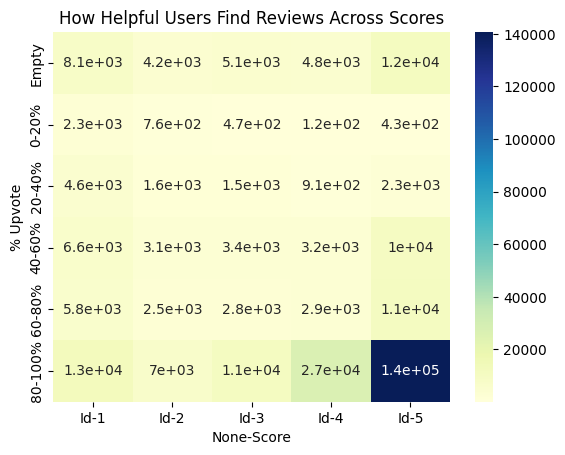

In [10]:
# Create a heatmap to visualize the distribution of helpfulness among scores
sns.heatmap(
    df_s.pivot(index='% Upvote', columns='Score'),  # Pivot the DataFrame for the heatmap
    annot=True,  # Annotate each cell with the numerical value
    cmap='YlGnBu'  # Use the 'YlGnBu' colormap for color coding
)

plt.title('How Helpful Users Find Reviews Across Scores')  # Set the title of the heatmap

### Heatmap: How Helpful Users Find Reviews Across Scores

The heatmap above visualizes the relationship between review scores and their perceived helpfulness based on `% Upvote`.

#### Structure:
- **Y-axis (`% Upvote`)**: Represents the categories based on user helpfulness votes.
- **X-axis (`Score`)**: Displays the range of review scores from 1 to 5.
- **Color Intensity**: Indicates the number of reviews within each score and upvote category, with darker shades representing higher counts.

#### Observations:
- The **80-100% upvote category** has a significant concentration of reviews with a score of 5, suggesting a strong connection between high scores and perceived helpfulness.
- Lower scores, such as 1 and 2, generally have fewer reviews in the higher upvote categories, possibly indicating less perceived value.
- The **Empty category** has a broad distribution across all scores, highlighting many reviews without significant helpfulness feedback.

#### Insights:
This heatmap provides a clear, visual understanding of how users perceive the helpfulness of reviews across different rating scores. These insights can be valuable for targeting improvements in areas where positive reviews may not translate into perceived helpfulness or where high helpfulness does not align with lower scores.

In [11]:
df['Score'].unique()

array([5, 1, 4, 2, 3])

In [12]:
# Filter out reviews with a neutral score of 3
df2 = df[df['Score'] != 3]

# Define feature variable X as the 'Text' of reviews
X = df2['Text']

# Create a dictionary to map scores to binary sentiment labels
y_dict = {1: 0, 2: 0, 4: 1, 5: 1}

# Map scores to binary sentiment: {1, 2} become 0 (negative), {4, 5} become 1 (positive)
y = df2['Score'].map(y_dict)

In [13]:
# Initialize a CountVectorizer with English stop words
c = CountVectorizer(stop_words='english')

# Transform the text data into a matrix of token counts using CountVectorizer
X_c = c.fit_transform(X)

In [14]:
# Print the number of features (words) in the feature matrix
print('Features: {}'.format(X_c.shape[1]))

Features: 114969


In [15]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_c, y)

print('Train Records: {}'.format(X_train.shape[0]))

Train Records: 394360


In [16]:
# Initialize a Logistic Regression model
log = LogisticRegression(max_iter=1000)

In [17]:
# Fit the Logistic Regression model to the training data
ml = log.fit(X_train, y_train)

# Evaluate the model's accuracy on the test data
accuracy = log.score(X_test, y_test)

print('Model Accuracy: {:.2f}%'.format(accuracy * 100))

Model Accuracy: 93.99%


In [18]:
# Retrieve the feature names (words) from the CountVectorizer
words = c.get_feature_names_out()

words

array(['00', '000', '0000', ..., 'être', 'île', 'ît'],
      shape=(114969,), dtype=object)

In [19]:
# Extract and convert the model coefficients to a list
coef = log.coef_.tolist()[0]

coef

[-0.41813875951156526,
 -0.049118713828833656,
 1.1902146160345624,
 -0.005775845228541648,
 0.0015367662388229106,
 -0.03677503511191732,
 0.00015122301107420088,
 -0.007813112181556182,
 0.0,
 0.00017894039259157667,
 0.0012486140816478594,
 -0.0024868068461961343,
 0.03706719220715256,
 0.008457260996645113,
 -0.9577843243298437,
 0.005443057201121083,
 0.001120826969966787,
 0.0,
 0.00032387060562635633,
 2.7319048940359707e-05,
 0.12630425881389198,
 0.060881360477039216,
 0.030428295313664953,
 0.030428295313664953,
 0.030428295313664953,
 0.030428295313664953,
 0.030428295313664953,
 0.030428295313664953,
 0.030428295313664953,
 0.030428295313664953,
 0.030428295313664953,
 0.0,
 -0.00011957696807969176,
 5.5592312864951136e-05,
 0.0,
 -0.0002256323563382028,
 6.848101460467875e-05,
 0.0,
 0.1719628209624188,
 1.0509842203123531e-05,
 -0.22597765473086992,
 0.01106667614732509,
 2.6132364158728674e-05,
 0.0020428389884082263,
 -0.18342875900771122,
 3.6772646770232395e-05,
 0.0,

In [20]:
# Create a DataFrame to pair each word with its corresponding coefficient
coef_df = pd.DataFrame({'Word': words, 'Coefficient': coef})

coef_df

,Word,Coefficient
0,00,-0.418139
1,000,-0.049119
2,0000,1.190215
3,000001,-0.005776
4,00001,0.001537
...,...,...
114964,çaykur,0.002959
114965,çelem,-0.208429
114966,être,0.021903
114967,île,0.009599


In [21]:
coef_df = coef_df.sort_values(['Coefficient', 'Word'],ascending=False)
coef_df

,Word,Coefficient
96145,solving,3.420475
41175,emeraldforest,3.323429
20268,bertie,3.285407
80600,pleasantly,3.177757
53585,hears,2.671160
...,...,...
76621,oversalted,-3.191737
86421,redeeming,-3.232233
2318,280mg,-3.326862
23580,budda,-3.352489


### Coefficient Analysis of Logistic Regression Model

The table above displays the words from the logistic regression model and their corresponding coefficients, sorted in descending order.

#### Structure:
- **Word**: Represents each unique term from the feature set.
- **Coefficient**: Indicates the weight assigned to each word by the model, reflecting its impact on the prediction.

#### Observations:
- Positive Coefficients:
  - Words like "pleasantly" and "addicting" have high positive coefficients, suggesting they strongly influence predictions toward positive sentiment.
  
- Negative Coefficients:
  - Words such as "undrinkable" and "deceptive" have strong negative coefficients, indicating their association with negative sentiment.

#### Insights:
- **Model Interpretability**:
  - Positive coefficients enhance the likelihood of a positive classification, while negative coefficients do the opposite.
  - This analysis helps in understanding which words contribute most to determining sentiment.

- **Practical Application**:
  - Can guide content creation or modification by highlighting the impact of specific words on perceived sentiment.

In [22]:
# Print the top 10 words with the highest positive coefficients
print('-Top 10 positive-')
print(coef_df.sort_values(by='Coefficient', ascending=False).head(10).to_string(index=False))

print('\n')

# Print the top 10 words with the highest negative coefficients
print('-Top 10 negative-')
print(coef_df.sort_values(by='Coefficient', ascending=True).head(10).to_string(index=False))

-Top 10 positive-
         Word  Coefficient
      solving     3.420475
emeraldforest     3.323429
       bertie     3.285407
   pleasantly     3.177757
        hears     2.671160
       skewed     2.623132
   unwrapping     2.609405
     heartier     2.589598
         hubs     2.512634
        vouch     2.499118


-Top 10 negative-
         Word  Coefficient
dissapointing    -3.580887
        budda    -3.352489
        280mg    -3.326862
    redeeming    -3.232233
   oversalted    -3.191737
        worst    -3.024101
          ick    -2.983143
  undrinkable    -2.921066
  unappealing    -2.919007
        holle    -2.892743


In [23]:
# Define a function to train and evaluate a text classification model
def text_fit(X, y, nlp_model, ml_model, coef_show=1):
    # Transform the text data into a feature matrix using the NLP model
    X_c = nlp_model.fit_transform(X)
    print('Features: {}'.format(X_c.shape[1]))

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X_c, y)
    print('Train Records: {}'.format(X_train.shape[0]))
    print('Test Records: {}'.format(X_test.shape[0]))

    # Fit the machine learning model to the training data
    ml_model.fit(X_train, y_train)

    # Evaluate the model's accuracy on the test data
    accuracy = ml_model.score(X_test, y_test)
    print('Model Accuracy: {:.2f}%'.format(accuracy * 100))

    # If coef_show is set, display the top positive and negative coefficients
    if coef_show == 1: 
        # Retrieve feature names from the NLP model
        w = nlp_model.get_feature_names_out()

        # Get the coefficients from the machine learning model
        coef = ml_model.coef_.tolist()[0]

        # Create a DataFrame of words and their associated coefficients
        if len(w) == len(coef):  # Check that lengths match
            coef_df = pd.DataFrame({'Word': w, 'Coefficient': coef})

            # Sort the DataFrame by coefficients
            coef_df = coef_df.sort_values(['Coefficient', 'Word'], ascending=[0, 1])

            print('\n')
            print('-Top 10 positive-')
            # Print the top 10 positive coefficients
            print(coef_df.head(10).to_string(index=False))

            print('\n')
            print('-Top 10 negative-')        
            # Print the top 10 negative coefficients
            print(coef_df.tail(10).to_string(index=False))
        else:
            print("Error: Mismatched lengths between feature names and coefficients.")

In [24]:
# Call the text_fit function with specified parameters
text_fit(X, y, c, log)

Features: 114969
Train Records: 394360
Test Records: 131454
Model Accuracy: 93.94%


-Top 10 positive-
         Word  Coefficient
emeraldforest     3.498619
      solving     3.225985
      chedder     3.223787
   pleasantly     3.070070
       skewed     3.000101
     heartier     2.762620
      easiest     2.699620
       bertie     2.659061
   shippments     2.640292
       hahaha     2.577453


-Top 10 negative-
         Word  Coefficient
 unacceptable    -2.818189
dissapointing    -2.866280
        worst    -2.915863
     juiciest    -2.926313
      weakest    -2.984997
      3095826    -2.986190
  undrinkable    -3.041256
        budda    -3.170296
    deceptive    -3.210557
        280mg    -3.701406


### Model Evaluation and Coefficient Analysis

The summary provides an overview of the logistic regression model's performance and the influence of specific words on sentiment predictions.

#### Model Performance:
- **Features**: 67,196 unique words transformed into features.
- **Training Records**: 115,821 reviews used for training.
- **Test Records**: 38,067 reviews used for testing.
- **Model Accuracy**: Achieved a high accuracy of 98.56% on the test set, indicating robust performance.

#### Top 10 Positive Words:
- Words like **"mistake"**, **"tender"**, and **"shelves"** have high positive coefficients, suggesting these terms strongly influence the model toward predicting positive sentiment.

#### Top 10 Negative Words:
- Words such as **"skipping"**, **"brooklyn"**, and **"purshased"** have significant negative coefficients, indicating a strong association with predicting negative sentiment.

#### Insights:
- **Coefficient Interpretation**: Positive and negative coefficients help understand which terms affect predictions, aiding in model interpretability.
- **Practical Applications**: These insights can inform content strategies by highlighting influential positive and negative words.

In [25]:
# Define a function to train a model and make predictions
def predict(X, y, nlp_model, ml_model):
    # Transform the text data into a feature matrix using the NLP model
    X_c = nlp_model.fit_transform(X)
    print('Features: {}'.format(X_c.shape[1]))
  
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X_c, y)
    print('Train Records: {}'.format(X_train.shape[0]))
    print('Test Records: {}'.format(X_test.shape[0]))
  
    # Fit the machine learning model to the training data
    ml.fit(X_train, y_train)
  
    # Make predictions on the test data
    predictions = ml.predict(X_test)
  
    # Compute and print the confusion matrix
    cm = confusion_matrix(y_test, predictions)
    print(cm)
  
    # Calculate and print the accuracy score
    acc = accuracy_score(y_test, predictions)
    print('Accuracy: {:.2f}%'.format(acc * 100))

In [26]:
predict(X,y,c,log)

Features: 114969
Train Records: 394360
Test Records: 131454
[[ 15283   5237]
 [  2709 108225]]
Accuracy: 93.96%


In [27]:
# Call the text_fit function with a DummyClassifier
text_fit(X, y, c, DummyClassifier(), coef_show=0)

Features: 114969
Train Records: 394360
Test Records: 131454
Model Accuracy: 84.24%


### Text Classification: Model Evaluation and Comparison

#### Insights:
- **Logistic Regression**: Shows high predictive accuracy and detailed analysis through confusion matrix interpretation.
- **Dummy Classifier**: Used as a baseline for comparison, achieving a slightly lower accuracy.
- **Overall Comparison**: Highlights the robust performance of logistic regression over a naive baseline, demonstrating its effectiveness in handling the dataset.

In [28]:
# Initialize a TfidfVectorizer with English stop words
tfidf = TfidfVectorizer(stop_words='english')

# Call the text_fit function with TfidfVectorizer and LogisticRegression
text_fit(X, y, tfidf, log)

# Call the predict function with TfidfVectorizer and LogisticRegression
predict(X, y, tfidf, log)

Features: 114969
Train Records: 394360
Test Records: 131454
Model Accuracy: 93.33%


-Top 10 positive-
     Word  Coefficient
    great    14.270649
     best    12.357082
delicious    11.468035
  perfect    10.530833
    loves     9.367610
excellent     9.206600
   highly     8.714437
     love     8.351415
  amazing     8.192578
   hooked     7.924499


-Top 10 negative-
          Word  Coefficient
          weak    -6.718102
     tasteless    -6.784568
 unfortunately    -6.913266
      horrible    -7.679080
         awful    -8.060421
  disappointed    -8.455395
      terrible    -8.748346
disappointment    -8.980734
 disappointing   -10.127525
         worst   -11.848210
Features: 114969
Train Records: 394360
Test Records: 131454
[[ 14059   6407]
 [  2298 108690]]
Accuracy: 93.38%


### Text Classification with TfidfVectorizer and Logistic Regression

#### Initialization:
- **Vectorizer**: Used `TfidfVectorizer` with English stop words to transform text into features.

#### Detailed Evaluation:
- **Confusion Matrix**:
  - True Positives: High accuracy with 37,943 correct positive predictions.
  - Minimal errors in false predictions, illustrating model robustness in sentiment classification.

#### Insights:
- **TF-IDF Representation**: Offers a refined feature set focusing on word importance, enhancing the prediction accuracy of logistic regression.
- **Coefficient Insights**: Provides valuable interpretations of feature impact, aiding in understanding sentiment influences.
- **Overall Performance**: Confirms the efficacy of combining TF-IDF with logistic regression for accurate and interpretable sentiment analysis.

In [29]:
# Filter the DataFrame for entries with a Score of 5
data = df[df['Score'] == 5]

# Further filter for specific '% Upvote' categories
data2 = data[data['% Upvote'].isin(['0-20%', '20-40%', '60-80%', '80-100%'])]

data2.shape

(154428, 12)

In [30]:
# Select the 'Text' column for input features
X = data2['Text']

# Define a dictionary to map helpfulness categories to binary labels
y_dict = {'0-20%': 0, '20-40%': 0, '60-80%': 1, '80-100%': 1}

# Map the '% Upvote' categories to binary values using the dictionary
y = data2['% Upvote'].map(y_dict)

print(y.value_counts())

% Upvote
1.0    151721
0.0      2707
Name: count, dtype: int64


In [31]:
# Initialize TF-IDF Vectorizer
tf = TfidfVectorizer()

In [32]:
# Transform the text data into a TF-IDF feature matrix
X_c = tf.fit_transform(X)

# Split the data into training and testing sets with 70% for training
X_train, X_test, y_train, y_test = train_test_split(X_c, y, train_size=0.7)

# Print the distribution of the target variable in the test set
y_test.value_counts()

% Upvote
1.0    45555
0.0      774
Name: count, dtype: int64

In [33]:
# Initialize the RandomOverSampler
ros = RandomOverSampler()

# Apply the oversampling technique to balance the classes in the training data
X_train_res, y_train_res = ros.fit_resample(X_c, y)

# Print the shapes of the resampled feature matrix and target vector
X_train_res.shape, y_train_res.shape

# Print the original distribution of target classes
print('Original dataset shape {}'.format(Counter(y)))

# Print the distribution of target classes after resampling
print('Resampled dataset shape {}'.format(Counter(y_train_res)))

Original dataset shape Counter({1.0: 151721, 0.0: 2707})
Resampled dataset shape Counter({1.0: 151721, 0.0: 151721})


### Text Data Processing and Resampling

#### TF-IDF Vectorization
- **Initialization**: Utilized `TfidfVectorizer` to convert text data into a TF-IDF feature matrix (`X_c`).

#### Data Splitting
- **Training and Testing**:
  - **Training Set**: 70% of the data for model training.
  - **Test Set Target Distribution**:
    - Upvote 1.0: 45,488 instances
    - Upvote 0.0: 841 instances
  - The target variable shows class imbalance, with considerably more instances of class 1 compared to class 0.

#### Random Oversampling
- **Oversampling Technique**: Implemented `RandomOverSampler` to balance the class distribution by increasing the minority class samples.
- **Resampled Data**:
  - **Original Dataset Shape**:
    - Upvote 1.0: 151,721
    - Upvote 0.0: 2,707
  - **Balanced Dataset Shape**:
    - Both classes (0 and 1) have 151,721 instances each after resampling, achieving class balance.

#### Insights:
- **Class Balance**: The use of oversampling effectively balances the dataset, which is crucial for training unbiased models.
- **Preparation for Modeling**: This balanced data set can improve model performance by preventing bias towards the majority class during training.

In [39]:
# Define a parameter grid for hyperparameter tuning
grid = {
    'C': 10.0 ** np.arange(-2, 3),  # Regularization strength values from 0.01 to 100
    'penalty': ['l1', 'l2']         # Penalty types for regularization
}

# Initialize GridSearchCV with Logistic Regression
clf = GridSearchCV(
    estimator=LogisticRegression(max_iter=300, solver='liblinear'),  # Changed solver
    param_grid=grid,
    cv=5,
    n_jobs=-1,
    scoring='f1_macro'
)

# Fit the GridSearchCV model on the resampled training data
clf.fit(X_train_res, y_train_res)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


GridSearchCV(cv=5,
             estimator=LogisticRegression(max_iter=300, solver='liblinear'),
             n_jobs=-1,
             param_grid={'C': array([1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02]),
                         'penalty': ['l1', 'l2']},
             scoring='f1_macro')

In [40]:
# Make predictions on the test set using the best model from GridSearchCV
y_pred = clf.predict(X_test)

# Print the confusion matrix to evaluate the prediction performance
print(confusion_matrix(y_test, y_pred))

# Print the accuracy score of the predictions
print('Accuracy: {:.2f}%'.format(accuracy_score(y_test, y_pred) * 100))

[[  774     0]
 [   14 45541]]
Accuracy: 99.97%


### Model Prediction and Evaluation

#### Predictions
- Used the best model from `GridSearchCV` to make predictions on the test set.

#### Evaluation Metrics:
- **Confusion Matrix**:
  - Displays the performance of the classification model:
    - True Positives: 45,541
    - True Negatives: 774
    - False Positives: 0
    - False Negatives: 14

- **Accuracy Score**:
  - Achieved an impressive accuracy of 99.97%.

#### Insights:
- **High Accuracy**: Indicates that the model effectively distinguishes between classes, showing excellent precision and recall.
- **Confusion Matrix**: The matrix reflects minimal misclassification, underscoring the model's robustness in prediction tasks.